In [1]:
# This sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
import pandas as pd
import statsmodels.formula.api as smf

# Imports our new data set!
dataset = pd.read_csv('Data/chocolate data multiple linear regression.txt', index_col=False, sep="\t",header=0)

In [2]:
print(dataset.head())

   weight  cocoa_percent   cost  customer_happiness
0     247           0.11   0.25                  29
1     192           0.82  10.44                  29
2     106           0.01   0.00                   6
3      78           0.04   0.01                   4
4     213           0.39   2.56                  30


### Regresión lineal simple para felicidad de clientes - peso

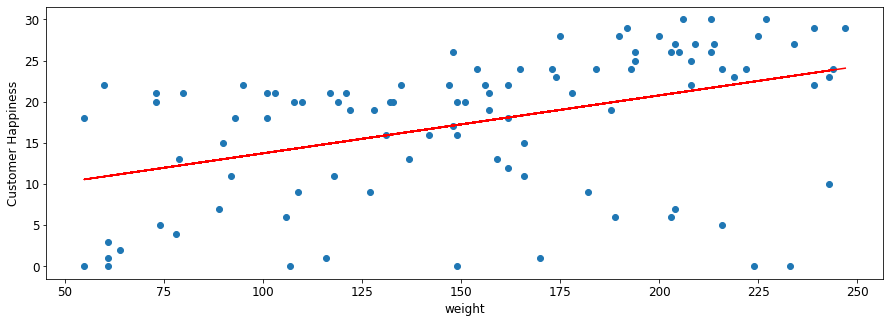

In [3]:
formula = 'customer_happiness ~ weight'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

##### Pero al estar muy dispersos los puntos de la línea, no nos dice nada con  la regresión lineal simple.

### Regresión lineal simple para felicidad de clientes - porcentaje de cocoa

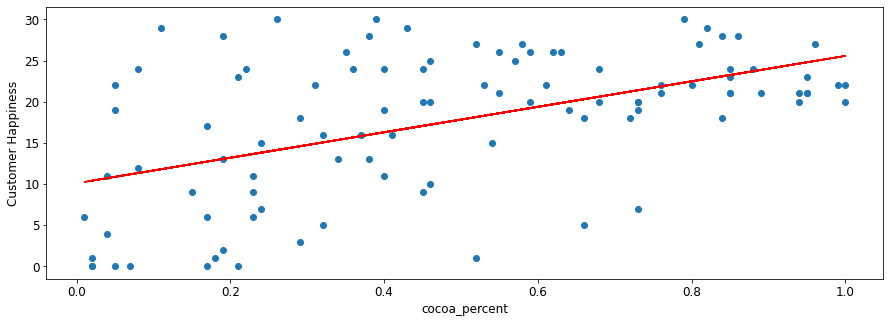

In [4]:
formula = 'customer_happiness ~ cocoa_percent'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

### Repetimos, para obtener la regresión lineal simple sin gráfico

In [5]:
formula = 'customer_happiness ~ weight'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

### Valores R^2

In [6]:
print(lm.rsquared)
#Un valor menor a 0.3 significa un ajuste deficiente, para este propósito

0.1887701234022121


### Regresión lineal múltiple

In [7]:
formula = 'customer_happiness ~ weight + cocoa_percent + cost'
###

# This creates a new model with all three features
lm = smf.ols(formula = formula, data = dataset).fit()

# Print the coefficients (slopes) of our new model
print(lm.params)

print("R²: " + str(lm.rsquared))

#La felicidad del cliente aumenta si aumenta su peso y/o el porcentaje de cocoa
#pero no si aumenta su costo

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64
R²: 0.5554156557713101


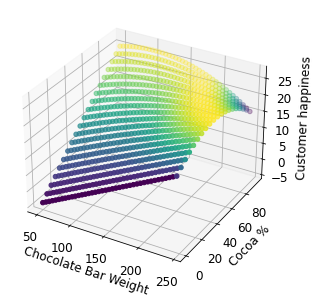

In [8]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def CalculateCustomerHappiness(weight, cocoa_percent):
    # This calculates the customer happiness for a given bar of chocolate
    cocoa_fraction = cocoa_percent / 100
    cost = (weight * 0.05 + weight * cocoa_fraction)**2 * 0.0004
    
    # First coefficient
    coeff_intercept = lm.params[0]
    
    # Second coefficient
    coeff_weight = lm.params[1]
    
    # Third coefficient
    coeff_cocoa = lm.params[2]
    
    # Fourth coefficient
    coeff_cost = lm.params[3]
    
    customer_happiness = (coeff_intercept) + (weight * coeff_weight) + (cocoa_fraction * coeff_cocoa) + (cost * coeff_cost)
    ###
    
    return customer_happiness
       
    
# Don't edit this part! This creates our graph.
def Graph3d():
    # This creates a 3D graph of likely customer happiness with different types of chocolate bar
    fig = graph.figure()
    ax = fig.add_subplot(111, projection='3d')

    cocoaPercentages=range(0,100,5)
    for weight in range(50,250,5):
        happiness=[]
        for cocoa in cocoaPercentages:
            happiness.append(CalculateCustomerHappiness(weight,cocoa))

        ax.scatter(np.full(len(happiness),weight), cocoaPercentages, happiness,c=happiness)

    ax.set_xlabel('Chocolate Bar Weight')
    ax.set_ylabel('Cocoa %')
    ax.set_zlabel('Customer happiness')

    graph.show()
    
Graph3d()

# En el gráfico de abajo, los valores más altos en él (amarillo) muestran 
# una mayor felicidad del cliente. Podemos ver que nuestra barra óptima debería 
# rondar los 100g y contener una gran cantidad de cacao. Para las barras de 
# chocolate grandes, un contenido de cacao de alrededor del 50% parece ser ideal.